# NLP Project- Predicting Skincare Reviews Sentimental Analysis (Positive/Negative)

# 
Natural language processing helps computers communicate with humans in their own language and scales other language-related tasks. For example, NLP makes it possible for computers to read text, hear speech, interpret it, measure sentiment , etc.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import PorterStemmer
import warnings 
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ishant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ishant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Importing the dataset

In [2]:
df= pd.read_csv('Ulta Skincare Reviews.csv')

In [3]:
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [4]:
df.shape

(4150, 10)

## EDA & Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4147 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [6]:
df.isnull().sum()

Review_Title        0
Review_Text         3
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.Product.unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

In [9]:
df.Brand.unique()

array(['Dermalogica'], dtype=object)

C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


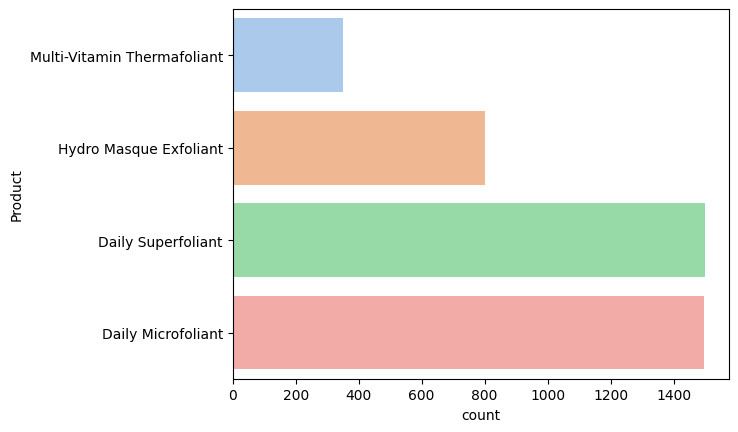

In [10]:
sns.countplot(data = df, y= 'Product', orient = 'V', palette = 'pastel')
# plt.xticks(rotation =45)
plt.show()

Text(0.5, 1.0, 'Review Upvotes Productwise')

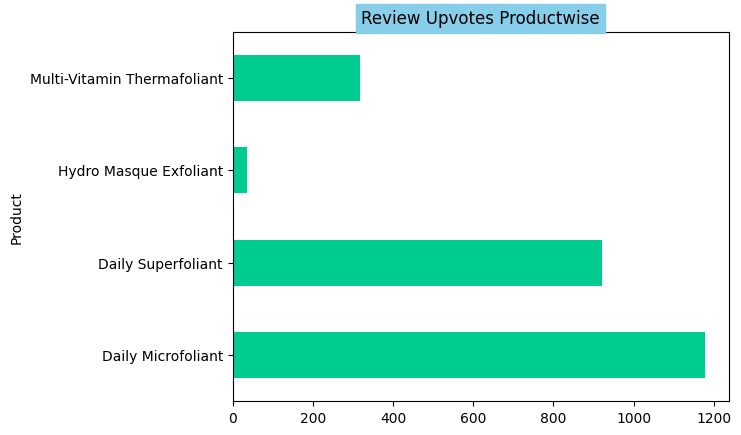

In [11]:
df.groupby('Product').sum()['Review_Upvotes'].plot(kind = 'barh', color='#00CC91')
plt.title('Review Upvotes Productwise', backgroundcolor = 'skyblue')

Text(0.5, 1.0, 'Review Downvotes Productwise')

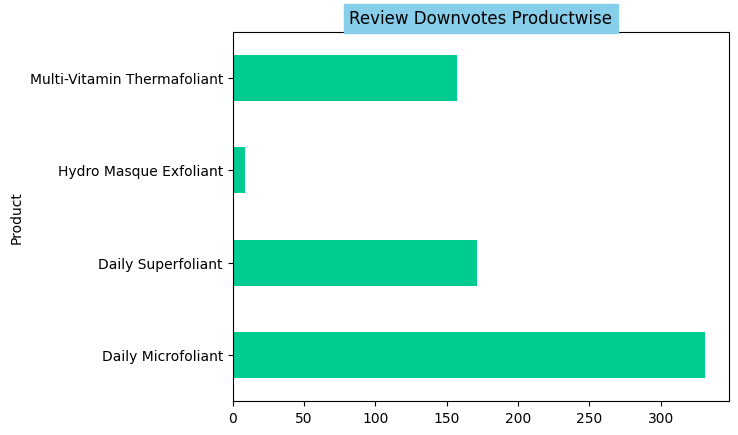

In [12]:
df.groupby('Product').sum()['Review_Downvotes'].plot(kind = 'barh', color='#00CC91')
plt.title('Review Downvotes Productwise', backgroundcolor = 'skyblue')

C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Verified_Buyer', ylabel='count'>

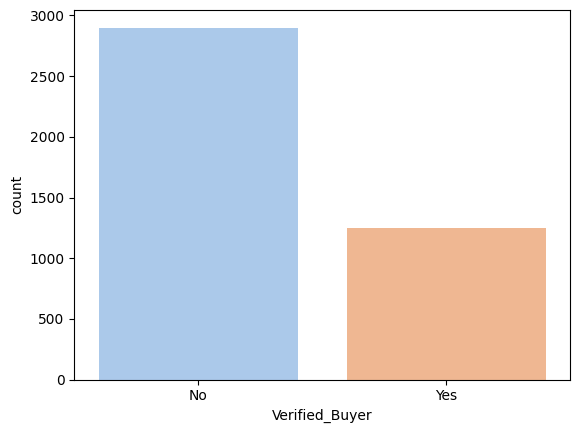

In [13]:
sns.countplot(data = df, x = 'Verified_Buyer', palette = 'pastel')

## Cleaning the text (Preprocessing)

In [14]:
df['Review_Text'] = df['Review_Text'].astype(str)
df['Review_Text'] = df['Review_Text'].apply(lambda x: x.lower())
df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x))
df['Review_Text'] = df['Review_Text'].apply(lambda x: word_tokenize(x))
df['Review_Text']

0       [love, using, this, on, my, face, while, in, t...
1       [even, better, than, the, daily, microfoliant,...
2       [enjoy, this, product, so, much, i, look, forw...
3       [i, ve, never, tried, anything, like, this, be...
4       [this, exfoliates, very, nicely, and, gives, a...
                              ...                        
4145              [much, better, product, than, a, scrub]
4146    [i, ve, been, using, this, exfoliant, for, a, ...
4147    [my, skin, looks, better, now, than, 10, years...
4148    [this, product, was, useless, for, me, i, shou...
4149    [this, product, is, amazing, it, is, the, only...
Name: Review_Text, Length: 4146, dtype: object

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in all_stopwords]
    return ' '.join(no_stopword_text)



df['Review_Text']= df['Review_Text'].apply(lambda x: remove_stopwords(x))

In [15]:
df['Review_Text'] = df['Review_Text'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
df['Review_Text']

0       [love, using, face, shower, heats, gives, ligh...
1       [even, better, daily, microfoliant, obsessed, ...
2       [enjoy, product, much, look, forward, using, r...
3       [never, tried, anything, like, love, apply, fa...
4       [exfoliates, nicely, gives, smooth, skin, irri...
                              ...                        
4145                       [much, better, product, scrub]
4146    [using, exfoliant, months, depending, conditio...
4147                [skin, looks, better, 10, years, ago]
4148    [product, useless, known, exfoliant, use, dail...
4149    [product, amazing, thing, helps, dry, patches,...
Name: Review_Text, Length: 4146, dtype: object

In [16]:
ps=PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
df['Review_Text'] = df['Review_Text'].apply(lambda x: [ps.stem(word) for word in x if word not in set(all_stopwords)])
# df['Review_Text'] = df['Review_Text'].apply(lambda x: [ps.stem(y) for y in x])
df['Review_Text'] = df['Review_Text'].apply(lambda x: ' '.join(x))
df['Review_Text']

0         love use face shower heat give light scrub nice
1       even better daili microfoli obsess skin much s...
2       enjoy product much look forward use realli fee...
3       never tri anyth like love appli face get littl...
4       exfoli nice give smooth skin irrit reaction sk...
                              ...                        
4145                            much better product scrub
4146    use exfoli month depend condit skin use anywhe...
4147                         skin look better 10 year ago
4148    product useless known exfoli use daili would g...
4149    product amaz thing help dri patch cheek also c...
Name: Review_Text, Length: 4146, dtype: object

In [17]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: textblob in c:\users\ishant\appdata\local\programs\python\python311\lib\site-packages (0.17.1)



DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


### TextBlob polarity
TextBlob uses a machine learning algorithm to classify the sentiment of text as either positive or negative.
It has a built-in feature that is used to classify text as positive or negative based on a set of predefined words and their associated polarities.
Polarity is between -1 and 1 with negative words giving rise to negative values and positive words giving positive values.

In [18]:
from textblob import TextBlob

In [19]:
df['Polarity'] = df['Review_Text'].map(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Polarity
0,Perfect,love use face shower heat give light scrub nice,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.500000
1,You need this,even better daili microfoli obsess skin much s...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.350000
2,Clean skin,enjoy product much look forward use realli fee...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.466667
3,Love This Stuff!,never tri anyth like love appli face get littl...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.600000
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.500000


array([[<Axes: title={'center': 'Polarity'}>]], dtype=object)

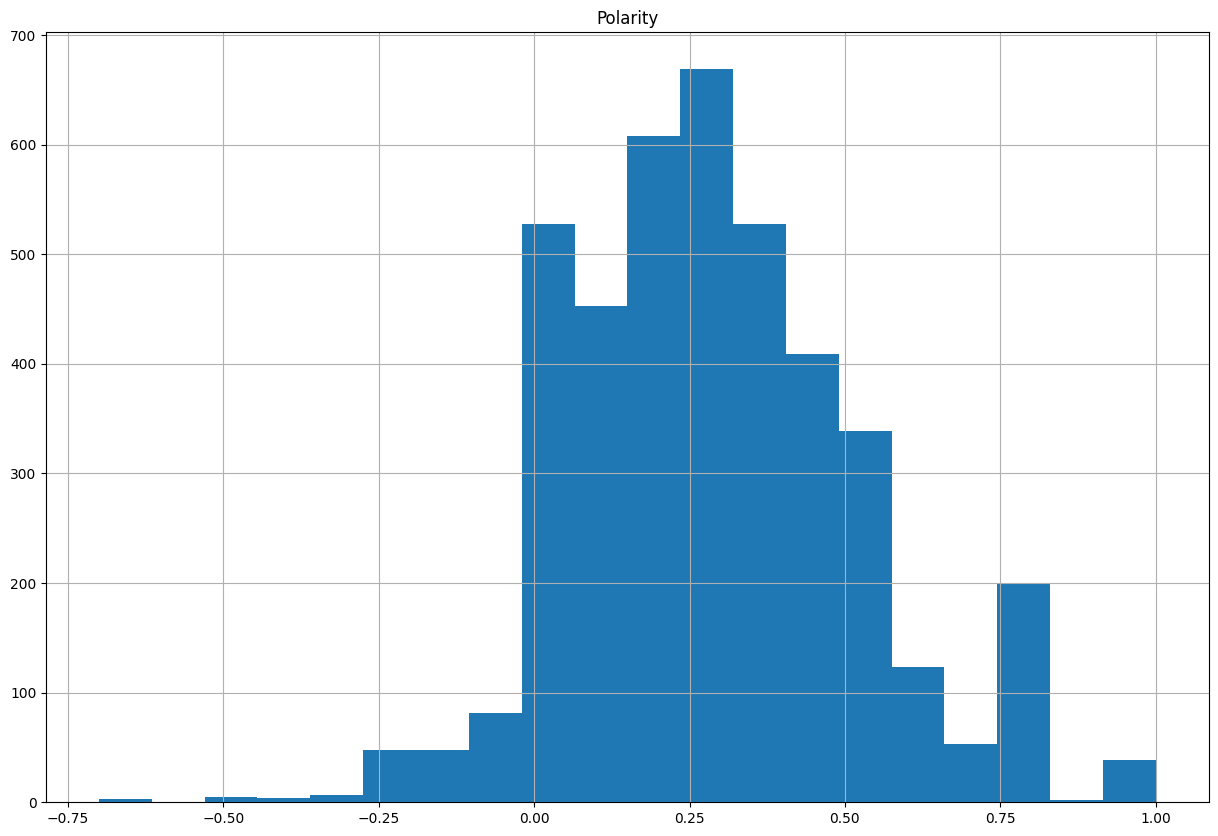

In [20]:
#seeing polarity distribution
df[["Polarity"]].hist(bins=20, figsize=(15, 10))

### Conclusion
Since majority of the data exists to the right of zero (skewed to the right), this indicates most of the reviews are positive.

These polarities are then converted to a sentient (either positive or negative) based on whether they're less than or greater than zero.

In [21]:
df['Sentiment'] = df['Polarity'].apply(lambda x: 1 if x >= 0 else 0)

In [22]:
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Polarity,Sentiment
0,Perfect,love use face shower heat give light scrub nice,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.500000,1
1,You need this,even better daili microfoli obsess skin much s...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.350000,1
2,Clean skin,enjoy product much look forward use realli fee...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.466667,1
3,Love This Stuff!,never tri anyth like love appli face get littl...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.600000,1
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.500000,1


C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

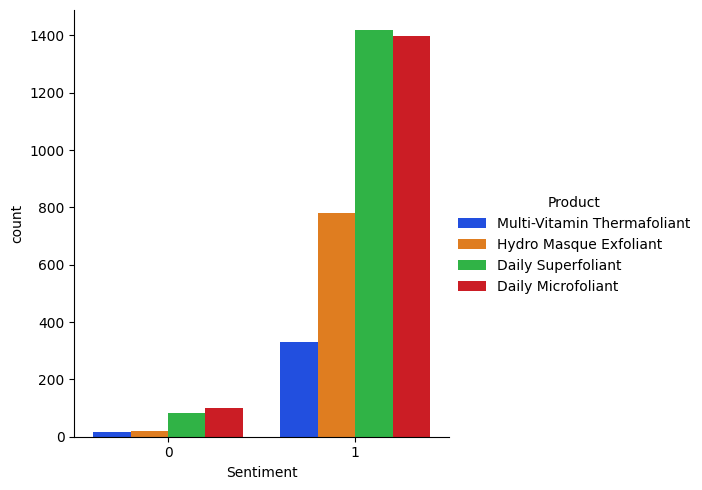

In [23]:
g = sns.catplot(x='Sentiment', kind='count', data=df, hue='Product', palette='bright')

### Conclusion
The Daily Microfoliant has the greatest number of good reviews while the Daily Superfoliant has the greated number of bad reviews.
All products have more positive reviews than negative ones.

In [24]:
df['Sentiment'].value_counts()

Sentiment
1    3927
0     219
Name: count, dtype: int64

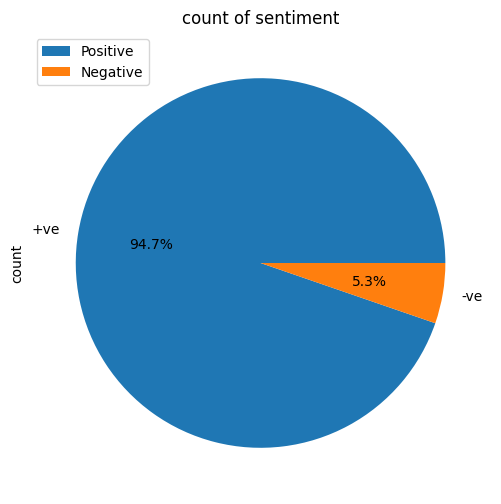

In [25]:
df['Sentiment'].value_counts().plot.pie(figsize=(6,6) , title='count of sentiment' ,labels=['+ve','-ve'],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=2)

##  Split the data into training and testing sets

In [26]:
X = df['Review_Text']
y = df['Sentiment']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Creating the Bag of Words model

### Count Vectorizer Model :
 

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [29]:
# Fit the vectorizer to the corpus and transform the text into a bag-of-words representation
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [30]:
# Train a linear support vector machine (SVM) classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('SVM accuracy:', svm_accuracy)

C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVM accuracy: 0.9506024096385542


C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 


In conclusion, the built model is quite good giving an accuracy of about 95%

## Naive Bayes¶


In [31]:
clf=MultinomialNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [32]:
nb_accuracy = accuracy_score(y_test, y_pred)
print('Naive Bayes accuracy:', nb_accuracy)

Naive Bayes accuracy: 0.9349397590361446


C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[  0  49]
 [  5 776]]


C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = svm_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 20  29]
 [ 12 769]]


C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

0.9506024096385542

# Predicting if a single review is positive or negative

In [35]:
new_review = 'I love this place so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = svm_clf.predict(new_X_test)
if new_y_pred[0] == 1:
    sentiment_label = "Positive"
else:
    sentiment_label = "Negative"

print("Predicted Sentiment:", sentiment_label)
print(new_y_pred)

Predicted Sentiment: Positive
[1]


### The review was correctly predicted as positive by our model.



## Negative review

In [36]:
new_review = "This drive was not amazing! Bad driver tho"
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = svm_clf.predict(new_X_test)
if new_y_pred[0] == 1:
    sentiment_label = "Positive"
else:
    sentiment_label = "Negative"

print("Predicted Sentiment:", sentiment_label)
print(new_y_pred)

Predicted Sentiment: Negative
[0]


## The review was correctly predicted as negative by our model.

 

In [37]:
new_text = ["the food is not good"]
new_text_vectorized = cv.transform(new_text)

In [38]:
predicted_sentiment = svm_clf.predict(new_text_vectorized)

if predicted_sentiment[0] == 1:
    sentiment_label = "Positive"
else:
    sentiment_label = "Negative"

print("Predicted Sentiment:", sentiment_label)

Predicted Sentiment: Positive
